<a href="https://colab.research.google.com/github/yuqiw4/GU-ANLY590-HW/blob/master/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1  Autoencoder

Code for building a convolutional autoencoder:

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.


Loading in the training data and testing data from MNIST dataset, we also need to do some data preprocessing.

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

11493376/11490434 [==============================] - 7s 1us/step


Code for training the autoencoder:

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1297 - val_loss: 0.1292
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.1250 - val_loss: 0.1271
Epoch 3/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.1215 - val_loss: 0.1190
Epoch 4/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1188 - val_loss: 0.1162
Epoch 5/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1162 - val_loss: 0.1142
Epoch 6/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1150 - val_loss: 0.1117
Epoch 7/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1133 - val_loss: 0.1104
Epoch 8/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1121 - val_loss: 0.1076
Epoch 9/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1110 - val_loss: 0.1

Here are some examples of input images and
their decoded reconstruction:

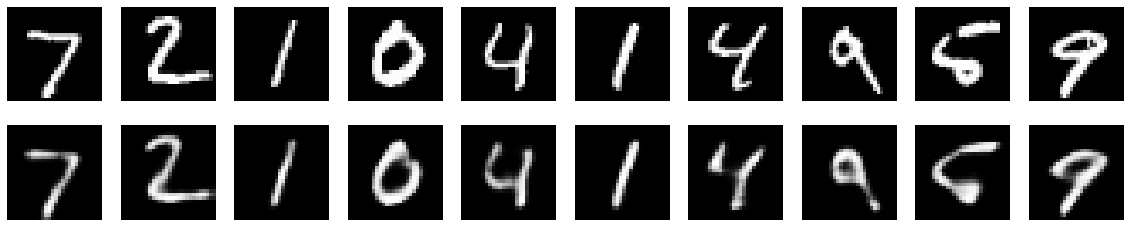

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## 2  Image Classification
###  2.1 Deep CNN

In [0]:
from keras.applications import VGG16
from keras.preprocessing import image
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
plt.viridis()

Loading in the training data and testing data from MNIST dataset, we also need to do some data preprocessing.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Code for building a deep convolutional neural network:

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
model.add(Conv2D(filters = 64,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Code for training the deep CNN:

In [0]:
batch_size = 128
num_epoch = 10
#model training
model_training = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.2670 - acc: 0.9167 - val_loss: 0.0735 - val_acc: 0.9766
Epoch 2/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0902 - acc: 0.9733 - val_loss: 0.0433 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0666 - acc: 0.9804 - val_loss: 0.0365 - val_acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0555 - acc: 0.9837 - val_loss: 0.0309 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0483 - acc: 0.9861 - val_loss: 0.0270 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0293 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0362 - acc: 0.9889 - val_loss: 0.0269 -

Plot for accuracy change during traing:

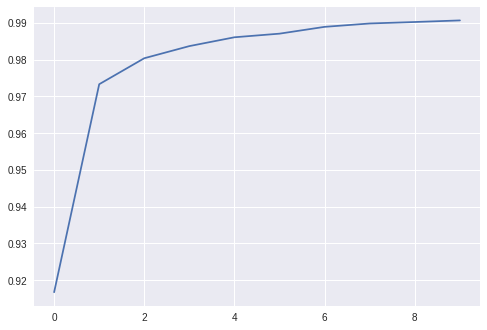

In [0]:
plt.plot(model_training.history["acc"])

Plot for loss change during traing:

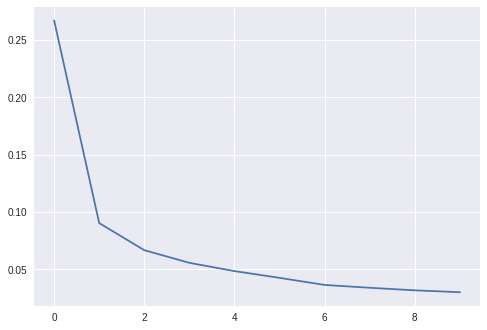

In [0]:
plt.plot(model_training.history["loss"])

Here are the final loss and final accuracy:

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02731422467695702
Test accuracy: 0.9917


Here are some examples of true y values and predicted y by our deep CNN model.

In [0]:
y_hat = model.predict_classes(X_test[:5])
print('Predicted Y:',y_hat)

Predicted Y: [7 2 1 0 4]


In [0]:
y = np.argmax(Y_test[:5], axis = 1)
print('True Y:',y)

True Y: [7 2 1 0 4]


### 2.2 Transfer Learning

In [0]:
from keras.applications import VGG16, InceptionV3, ResNet50, MobileNet
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop

In order to use VGG16 backbone, we need to resize our input image into at least $32\times32$ with 3 channels (RGB color scale).

In [0]:
from skimage.transform import resize

def resize_batch(X, new_size):
    num_images = X.shape[0] # 
    resized_X = np.zeros(shape=(num_images, new_size, new_size)) # final array
    for i in range(num_images):
        resized = resize(X[i], (new_size,new_size)) # 
        resized_X[i,:,:] = resized # 
    return resized_X

In [0]:
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils


(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = resize_batch(X_train, 32)
X_test = resize_batch(X_test, 32)

X_train = np.stack((X_train,)*3, axis=-1)
X_test = np.stack((X_test,)*3, axis=-1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [0]:
X_test[0].shape

(32, 32, 3)

Code for loading the pre-trained backbone and then adding the last dense layer:

In [0]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

58892288/58889256 [==============================] - 6s 0us/step


In [0]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(10, activation="sigmoid"))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv3

In [0]:
conv_base.trainable = False

In [0]:
model.trainable_weights

[<tf.Variable 'dense_3/kernel:0' shape=(512, 10) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32_ref>]

In [0]:
model.compile(optimizer='Adam',loss="binary_crossentropy",metrics=["accuracy"])

Since I found out that the accuarcy will not increase much while the number of epoch increases later. Thus, I just use 5 as the number of epochs. Here is the code for training our model:

In [0]:
batch_size = 128
num_epoch = 5

#model training
model_training = model.fit(X_train, Y_train,
                           epochs=num_epoch, 
                           batch_size = batch_size,
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 391us/step - loss: 0.3359 - acc: 0.8941 - val_loss: 0.3249 - val_acc: 0.9000
Epoch 2/5
60000/60000 [==============================] - 22s 363us/step - loss: 0.3249 - acc: 0.9000 - val_loss: 0.3246 - val_acc: 0.9000
Epoch 3/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.3246 - acc: 0.9000 - val_loss: 0.3243 - val_acc: 0.9000
Epoch 4/5
60000/60000 [==============================] - 23s 391us/step - loss: 0.3243 - acc: 0.9000 - val_loss: 0.3240 - val_acc: 0.9000
Epoch 5/5
60000/60000 [==============================] - 23s 388us/step - loss: 0.3241 - acc: 0.9000 - val_loss: 0.3236 - val_acc: 0.9000


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3235890708446503
Test accuracy: 0.8999999761581421


## 3 Text Classification

### 3.1 RNN

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Code for loading in our urls dataset:

In [0]:
benign_text = []
with open('/content/drive/My Drive/Colab Notebooks/benign-urls.txt') as f:
    for line in f:
        if line[0] != '#':
            benign_text.append(line.strip())

benign_n = len(benign_text)
print(benign_n)
print(benign_text[:10])


print()

malicious_text = []
with open('/content/drive/My Drive/Colab Notebooks/malicious-urls.txt') as f:
    for line in f:
        if line[0] != '#':
            malicious_text.append(line.strip())
            
malicious_n = len(malicious_text)
print(malicious_n)
print(malicious_text[:10])

X = benign_text + malicious_text
Y = [0]*benign_n + [1]*malicious_n

66015
['.0.blogger.gmodules.com', '.0.client-channel.google.com', '.0.docs.google.com', '.0.drive.google.com', '.0.gvt0.cn', '.0.gvt0.com', '.10.client-channel.google.com', '.10.docs.google.com', '.10.drive.google.com', '.11.client-channel.google.com']

1296
['.1337x.pl', '.1link.io', '.1n.pm', '.22apple.com', '.22find.com', '.2s5m19yk.ru', '.301.li', '.3utilities.com', '.44d.info', '.4everproxy.co']


In [0]:
from string import printable

X_token = [[printable.index(x) + 1 for x in url if x in printable] for url in X]

max_len = 100
X = sequence.pad_sequences(X_token, maxlen=max_len)

Y = np.array(Y)

print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', Y.shape)

Matrix dimensions of X:  (67311, 100) Vector dimension of target:  (67311,)


Split data into train and test set:

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

Code for building a RNN mode:

In [0]:
max_len = 100
max_words = 1000

model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_len))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 110,501
Trainable params: 110,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
!pip install keras_metrics

In [0]:
import keras_metrics

#model.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=[keras_metrics.precision(), keras_metrics.recall()])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Code for training my RNN mode:

In [0]:
model.fit(X_train, Y_train, epochs=5, batch_size=256)

Epoch 1/5
53848/53848 [==============================] - 107s 2ms/step - loss: 0.0457 - acc: 0.9817
Epoch 2/5
53848/53848 [==============================] - 105s 2ms/step - loss: 0.0277 - acc: 0.9869
Epoch 3/5
53848/53848 [==============================] - 106s 2ms/step - loss: 0.0249 - acc: 0.9884
Epoch 4/5
53848/53848 [==============================] - 105s 2ms/step - loss: 0.0247 - acc: 0.9879
Epoch 5/5
53848/53848 [==============================] - 105s 2ms/step - loss: 0.0245 - acc: 0.9883


In [0]:
!pip install pandas_ml

    100% |████████████████████████████████| 81kB 3.1MB/s 
  Running setup.py bdist_wheel for pandas-ml ... - \ done
  Stored in directory: /root/.cache/pip/wheels/4b/b0/88/51fb7203a0f81becae3e92d5bf9fee0460375e5408e67a7dc3
Successfully built pandas-ml


Here we can look at the confusion matrix:

In [0]:
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

y_hat = model.predict_classes(X_test)
cm = ConfusionMatrix(Y_test, y_hat[:,0])
cm

Predicted  False  True  __all__
Actual                         
False      13075   143    13218
True          21   224      245
__all__    13096   367    13463

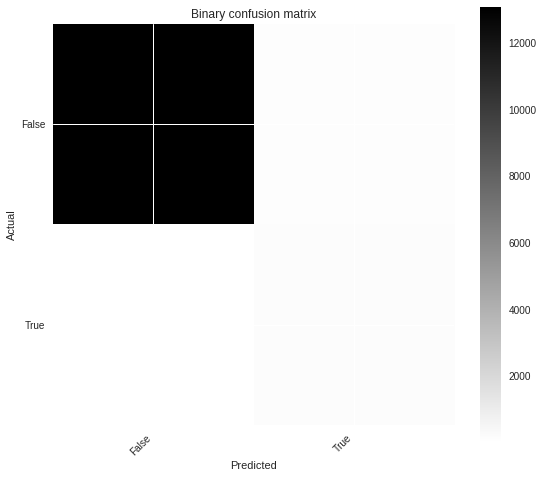

In [0]:
cm.plot()
plt.show()

Here we can look at the ROC curve and AUC score for my RNN model:

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_rf = model.predict_proba(X_test)[:, 0]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)

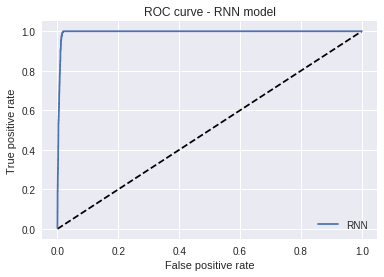

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RNN model')
plt.legend(loc='best')
plt.show()

In [0]:
metrics.auc(fpr_rf,tpr_rf)

0.9954381934344323

### 3.2 CNN

In [0]:
from keras.layers.core import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import  Conv1D, MaxPooling1D

#X_train,X_test,Y_train,Y_test

In [0]:
from keras.models import Sequential

model_CNN = Sequential()
model_CNN.add(Embedding(max_words, 50, input_length=max_len))
model_CNN.add(Dropout(0.25))
model_CNN.add(Conv1D(filters = 64,kernel_size=5, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=5))
model_CNN.add(Flatten())
model_CNN.add(Dense(10, activation='relu'))
model_CNN.add(Dropout(0.25))
model_CNN.add(Dense(1, activation='sigmoid'))

In [0]:
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 96, 64)            16064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 19, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                12170     
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
__________

In [0]:
model_CNN.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_CNN.fit(X_train, Y_train, epochs=3, batch_size=512)

Epoch 1/3
53848/53848 [==============================] - 24s 440us/step - loss: 0.0360 - acc: 0.9805
Epoch 2/3
53848/53848 [==============================] - 22s 415us/step - loss: 0.0347 - acc: 0.9805
Epoch 3/3
53848/53848 [==============================] - 22s 416us/step - loss: 0.0347 - acc: 0.9807


Note: If I use more batchs, I usually get a model to simply classify all test urls into benign class, and the accuracy is still high. So I complie my CNN model again with precision and recall as new metrics:


In [0]:
import keras_metrics

model_CNN.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=[keras_metrics.precision(), keras_metrics.recall()])
model_CNN.fit(X_train, Y_train, epochs=5, batch_size=512)

Epoch 1/5
53848/53848 [==============================] - 22s 414us/step - loss: 0.0324 - precision: 0.6318 - recall: 0.6204
Epoch 2/5
53848/53848 [==============================] - 22s 416us/step - loss: 0.0305 - precision: 0.6547 - recall: 0.7088
Epoch 3/5
53848/53848 [==============================] - 22s 414us/step - loss: 0.0297 - precision: 0.6535 - recall: 0.6603
Epoch 4/5
53848/53848 [==============================] - 22s 417us/step - loss: 0.0288 - precision: 0.6847 - recall: 0.6613
Epoch 5/5
53848/53848 [==============================] - 23s 424us/step - loss: 0.0254 - precision: 0.6940 - recall: 0.6775


Here we can look at the confusion matrix:

In [0]:
from pandas_ml import ConfusionMatrix
y_hat = model_CNN.predict_classes(X_test)

cm = ConfusionMatrix(Y_test, y_hat[:,0])
cm

Predicted  False  True  __all__
Actual                         
False      13152    66    13218
True          82   163      245
__all__    13234   229    13463

Here we can look at the ROC curve and AUC score for my CNN model:

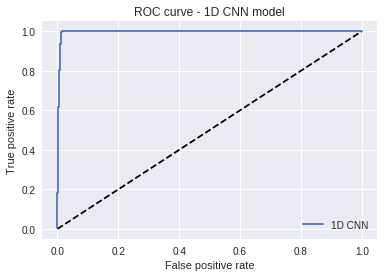

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_rf = model_CNN.predict_proba(X_test)[:, 0]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='1D CNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - 1D CNN model')
plt.legend(loc='best')
plt.show()

In [0]:
metrics.auc(fpr_rf,tpr_rf)

0.996380940029212

### 3.3

From above two ROC curves, we can barely tell which model performs better. However, the AUC score of CNN is slightly higher than the AUC score of RNN. Therefore, for this task with this data, my CNN model performs slightly better. In addition, training my CNN is much faster than training my RNN.  